# Feature Selection

In this notebook, we will perform feature selection using various techniques to identify the most relevant predictors for modeling. The steps include:
1. Using Feature Importance (Random Forest / XGBoost feature importance scores) to rank variables.
2. Applying Recursive Feature Elimination (RFE) to select the best predictors.
3. Using Chi-Square Test to check feature significance.
4. Selecting only the most relevant features for modeling.

Deliverables:
✔️ Reduced dataset with selected key features
✔️ Feature importance ranking visualization

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, chi2
import matplotlib.pyplot as plt
import seaborn as sns

# Load preprocessed data
heart_disease_data = pd.read_csv("heart_disease_cleaned.csv")

# Separate features and target
X = heart_disease_data.iloc[:, :-1]  # All columns except the last one
y = heart_disease_data.iloc[:, -1]  # The last column

print("Cleaned data loaded successfully!")
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Cleaned data loaded successfully!
Features shape: (303, 13)
Target shape: (303,)


In [2]:
# Feature Importance using Random Forest
print("Calculating feature importance using Random Forest...")
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
feature_importances = rf.feature_importances_

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Feature importance calculated successfully!")
print(importance_df)

Calculating feature importance using Random Forest...
Feature importance calculated successfully!
     Feature  Importance
7    thalach    0.138306
9    oldpeak    0.122138
4       chol    0.116422
0        age    0.113967
11        ca    0.097398
3   trestbps    0.091751
12      thal    0.077441
2         cp    0.075563
8      exang    0.047884
10     slope    0.042916
1        sex    0.028483
6    restecg    0.027269
5        fbs    0.020461


C:\Users\HP\AppData\Local\Temp\ipykernel_22340\1379844956.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


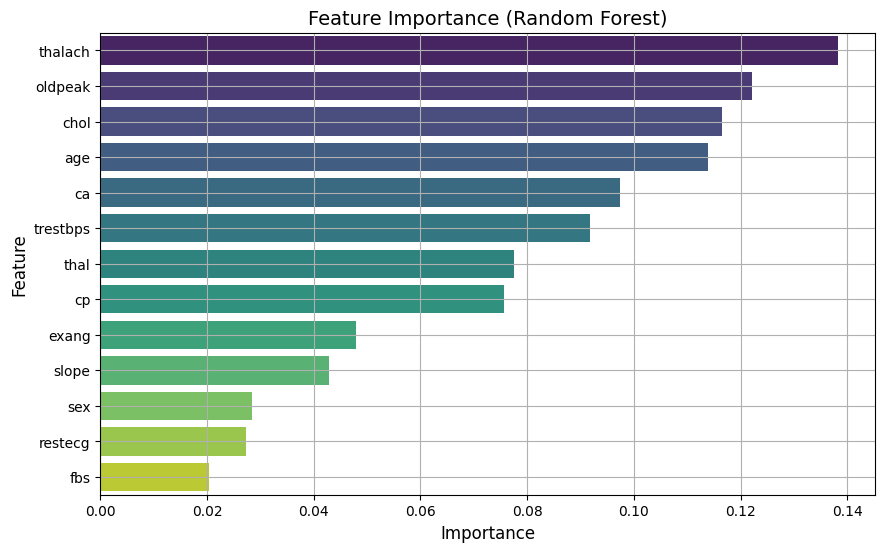

In [3]:
# Visualize Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance (Random Forest)', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(True)
plt.show()

In [4]:
# Recursive Feature Elimination (RFE)
print("Applying Recursive Feature Elimination (RFE)...")
rfe = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=5)
rfe.fit(X, y)

# Selected features
selected_features_rfe = X.columns[rfe.support_]
print("Selected features using RFE:", selected_features_rfe)

Applying Recursive Feature Elimination (RFE)...
Selected features using RFE: Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], dtype='object')


In [6]:
# Chi-Square Test
print("Applying Chi-Square Test...")

# Shift features to be non-negative for chi2
X_nonneg = X - X.min()

chi_selector = SelectKBest(score_func=chi2, k=5)
chi_selector.fit(X_nonneg, y)

# Selected features
selected_features_chi = X.columns[chi_selector.get_support()]
print("Selected features using Chi-Square Test:", selected_features_chi)

Applying Chi-Square Test...
Selected features using Chi-Square Test: Index(['exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype='object')


In [7]:
# Combine selected features from all methods
selected_features = set(selected_features_rfe).union(set(selected_features_chi))
print("Final selected features:", selected_features)

# Create reduced dataset
X_reduced = X[list(selected_features)]

print("Reduced dataset created successfully!")
print("Shape of reduced dataset:", X_reduced.shape)

Final selected features: {'thalach', 'trestbps', 'age', 'ca', 'thal', 'exang', 'oldpeak', 'slope', 'chol'}
Reduced dataset created successfully!
Shape of reduced dataset: (303, 9)


In [11]:
# Convert target variable to binary: 0 (no disease), 1 (disease present)
# Assuming 'num' == 0 means no disease, any other value means disease
y_binary = (y != 0).astype(int)
print("Binary target variable created. Value counts:")
print(y_binary.value_counts())

Binary target variable created. Value counts:
num
0    164
1    139
Name: count, dtype: int64


In [14]:
# Save reduced dataset
X_reduced.to_csv("heart_disease_reduced.csv", index=False)
print("Reduced dataset saved successfully!")
# Add target variable to reduced dataframe and save
X_reduced_with_target = X_reduced.copy()
X_reduced_with_target['num'] = y.values
X_reduced_with_target.to_csv("heart_disease_reduced_with_target.csv", index=False)
# Add binary target variable to reduced dataframe and save
X_reduced_with_binary = X_reduced.copy()
X_reduced_with_binary['num_binary'] = y_binary.values
X_reduced_with_binary.to_csv("heart_disease_reduced_with_binary.csv", index=False)
print("Reduced dataset with binary target variable (no 'num') saved successfully!")

Reduced dataset saved successfully!
Reduced dataset with binary target variable (no 'num') saved successfully!
